# Logistic Regression Practice

In [27]:
#Importing all relevant Python Packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.rc('font',size=14)

import seaborn as sb
sb.set(style='white')
sb.set(style='whitegrid',color_codes=True)

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics as me
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [28]:
# Reading CSV train data file into DataFrame

df = pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C5_S3_HR_Data_Practice.csv')

# previewing the data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [29]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

## Data Exploration & Visualization

In [30]:
# exploring the existing data types
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [31]:
# exploring the numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [32]:
 # exploring the strings
df_string=df.select_dtypes(exclude=[np.number])
df_string.head(3)

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium


### Task 1.1 : Visualizing the impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

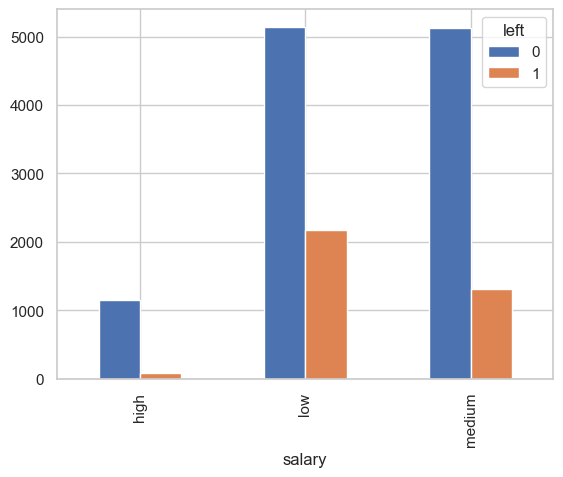

In [33]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

In [34]:
#From the above chart, Salary seems to play an important role in regards to the people who left the company.

### Task 1.2 : Visualizing departmentwise employee retention rate

<AxesSubplot:xlabel='Department'>

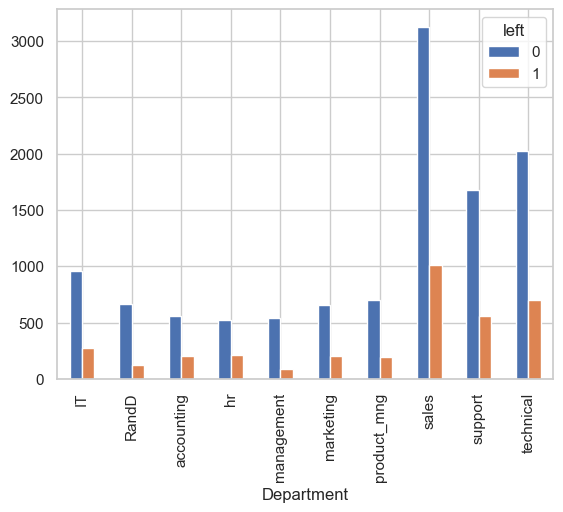

In [35]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

In [36]:
#From the above chart, Department seems to play an important role in regards to the people who left the company.

## Data Preprocessing

### Task 2.1 Access the missing value

In [37]:
 # checking missing values in data
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [38]:
#No missing value present in the dataset

### Task 2.2 Detect the correlations in dataset

[]

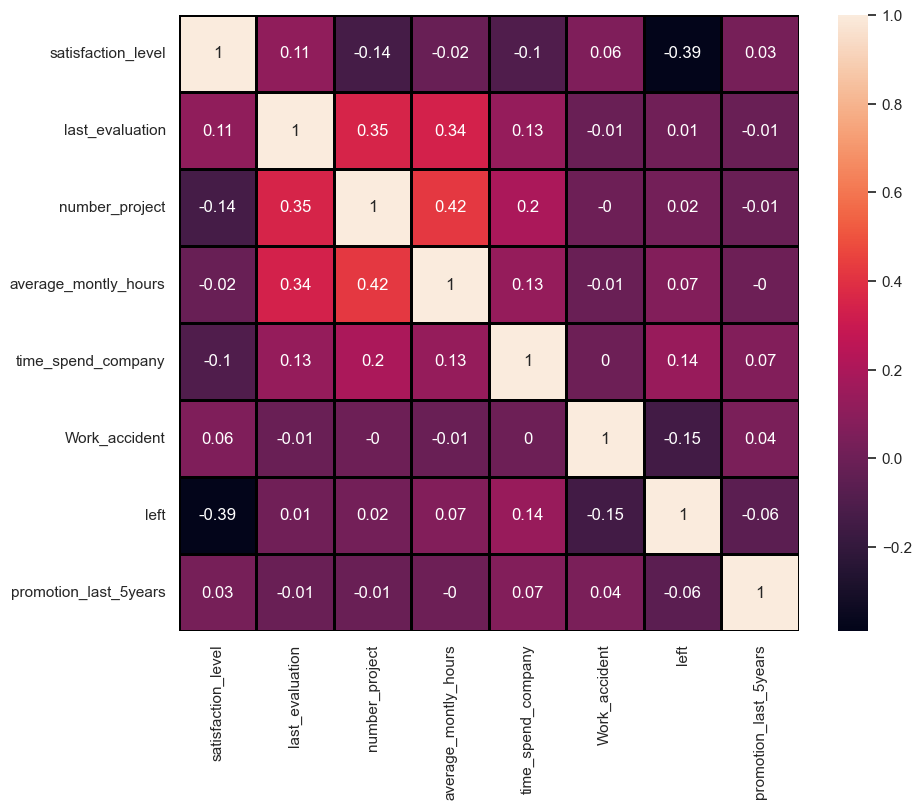

In [39]:
#Data quality | Detect correlations
plt.figure(figsize=(10,8))
sb.heatmap(round(df.corr(),2),annot=True,linewidths=0.8,linecolor='black')
plt.plot()

In [40]:
#not removing any feature from this dataset, as we can see none of the columns are highly correlated

### Task 2.3: Convert Salary and Department Data into text data

In [41]:
from sklearn.preprocessing import LabelEncoder

#Encoding Department variable to numeric variable
df['Department']=LabelEncoder().fit_transform(df['Department'])

#Encoding salary variable to numeric variable
df['salary']=LabelEncoder().fit_transform(df['Department'])

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,7
1,0.80,0.86,5,262,6,0,1,0,7,7
2,0.11,0.88,7,272,4,0,1,0,7,7
3,0.72,0.87,5,223,5,0,1,0,7,7
4,0.37,0.52,2,159,3,0,1,0,7,7


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  int32  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int32(1), int64(7)
memory usage: 1.1 MB


In [43]:
#Feature Scaling

sc=MinMaxScaler()
df=pd.DataFrame(sc.fit_transform(df),columns=df.columns)


# Modelling Logistic Regression

### Task 3.1 : Split the data into train and test sets.

In [44]:
X=df.drop(['left'],axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.777778,0.777778
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.777778,0.777778
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.777778,0.777778
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.777778,0.777778
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.777778,0.777778


In [45]:
Y=df['left']
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: left, dtype: float64

In [46]:
#Here splitting data in train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
print('Size of training X data : ',X_train.shape)
print('Size of training Y data : ',Y_train.shape)
print('Size of test X data : ',X_test.shape)
print('Size of test Y data : ',Y_test.shape)

Size of training X data :  (10499, 9)
Size of training Y data :  (10499,)
Size of test X data :  (4500, 9)
Size of test Y data :  (4500,)


### Task 3.2 : Logistic Regression: Train the model and predict the outcome for test data. Calculate accuracy of training data

In [47]:
# Logistic Regression - training the model
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

# Using the trained model to predict the outcome of the X_Test dataset
Y_pred=logreg.predict(X_test)

#Calculating the accuracy of the training dataset
acc_log=logreg.score(X_train,Y_train)
acc_log

0.7693113629869511

### Task 3.3 :Test for the accuracy of the model on the test data

In [48]:
# indicates the value of the slope of each parameter 

coeff_df = pd.DataFrame(df.columns.delete(6))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
4,time_spend_company,1.858290
3,average_montly_hours,0.926627
1,last_evaluation,0.504464
7,Department,0.151392
8,salary,0.151392
5,Work_accident,-1.493764
2,number_project,-1.504447
6,promotion_last_5years,-1.657282
0,satisfaction_level,-3.596328


In [53]:
 #model.intercept_ indicates the intercept with the Y-axis
logreg.intercept_

array([0.06733846])

In [55]:
# evalating the model on the test data
logreg.score(X_test, Y_test)

0.7648888888888888

In [60]:
from collections import Counter
x = 0
d = Counter(Y_pred)
print('{} has occurred {} times'.format(x, d[x]))

0 has occurred 3957 times


# Evaluation : COnfusion Matrix and ROC and AUC

### Task 4.1 : Confusion matrix : Calculate Accuracy , Recall ,F1- score and Feature


In [66]:
from sklearn.metrics import accuracy_score
print('Accuracy :',accuracy_score(Y_test,Y_pred))

from sklearn.metrics import recall_score
print('Recall : ',recall_score(Y_test,Y_pred))

from sklearn.metrics import f1_score
print('F1 Score : ',f1_score(Y_test,Y_pred))

Accuracy : 0.7648888888888888
Recall :  0.2656960873521383
F1 Score :  0.3556638246041412


In [68]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      3401
         1.0       0.54      0.27      0.36      1099

    accuracy                           0.76      4500
   macro avg       0.67      0.60      0.61      4500
weighted avg       0.73      0.76      0.73      4500



In [ ]:
# Calculate ROC, AUC Score

In [71]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test,logreg.predict_proba(X_test)[:,1])
roc

0.8188056341615523

Text(0, 0.5, 'TPR')

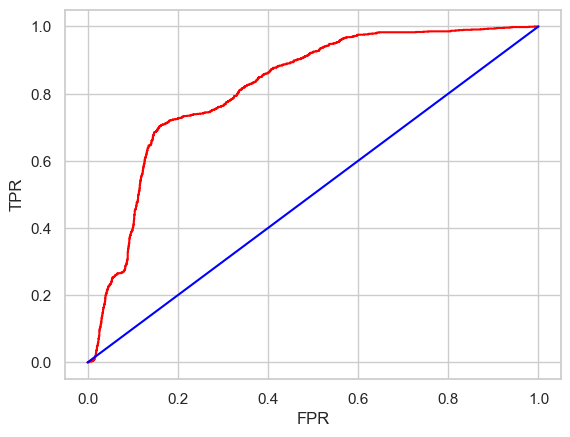

In [74]:
from sklearn.metrics import roc_curve
prob_val=logreg.predict_proba(X_test)[:,1]
fpr,tpr,threshode=roc_curve(Y_test,prob_val)
plt.plot(fpr,tpr,color='red',label='roc')
plt.plot([0,1],[0,1],color='blue',linestyle='-')
plt.xlabel('FPR')
plt.ylabel('TPR')